# Lab 2. Redes Neuronales desde cero

En este laboratorio implementaremos una red neuronal desde cero.
Necesitaremos las librerías `tensorflow`, `numpy` y `tensorflow_datasets`.

In [4]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

## Creación de una neurona artificial con Numpy

Una neurona artificial consta de dos partes diferenciadas. En primer lugar, la unidad realiza una suma de todas sus entradas (más una componente de *bias*), cada una de ellas ponderada por un peso. Estos pesos (y el *bias*) serán los que se modifiquen para conseguir que la neurona dé la salida adecuada para nuestro problema para cada combinación de entradas del conjunto de datos de entrada.

Dado un vector de entrada $\mathbf{x}$ con $d$ componentes y un vector de pesos $\mathbf{w}$, esta primera parte de la neurona calculará un único valor escalar de salida que llamaremos $z$ de la siguiente forma:

$$
z = \sum \limits_{i=0}^{d} \mathbf{x}_i\mathbf{w}_i + bias
$$

### Notación vectorial

Para simplificar la notación, podemos representar todos los pesos de una neurona como un vector. Al hacerlo así, la suma ponderada de las entradas será el producto escalar del vector $\mathbf{x}$ de entrada y el vector $\mathbf{w}$ de pesos. Teniendo en cuenta que asumiremos que el vector de entrada $\mathbf{x}$ es un vector fila de dimensiones 1 x $d$, declararemos el vector de pesos $\mathbf{w}$ con las mismas dimensiones y podremos representar el producto escalar $\mathbf{x} · \mathbf{w}$ como el producto matricial $\mathbf{x}\mathbf{w}^T$. Esto es ventajoso para poder procesar varios vectores de entrada utilizando la misma operación.

$$
z = \sum \limits_{i=0}^{d} \mathbf{x}_i\mathbf{w}_i + bias = \mathbf{x} · \mathbf{w} + bias = \mathbf{x} \mathbf{w}^T + bias
$$

Completa la siguiente celda para calcular $z$.

In [5]:
x = np.array([1, 2, 8, -4]).reshape((1,4)) # vector de entrada
print(x)
w = np.array([0.1, -0.8, 0.3, 0.2]).reshape((1,4)) # vector de pesos
print(w)
bias = 0.1

# TODO - completa esta línea
z = np.matmul(x, w.T) + bias

# verificación del resultado
np.testing.assert_almost_equal(0.2, z, err_msg='Revisa tu implementación')

[[ 1  2  8 -4]]
[[ 0.1 -0.8  0.3  0.2]]


### Función de activación

Tras este primer paso, la salida $z$ será una combinación lineal de las entradas. Si concatenamos varias neuronas así definidas, el resultado seguirá siendo una combinación lineal de las entradas, lo cual no es muy útil dado que se podría obtener el mismo resultado con una sola neurona. Es por ello que necesitamos que cada neurona tenga una segunda parte que introduzca una no-linealidad. Es lo que denominamos *función de activación*. En este ejemplo tomaremos como función de activación la función sigmoide, definida como:

$$sigmoide(x) = \dfrac{1}{1+e^{-x}}$$

Completa a continuación el código para calcular la sigmoide de un escalar $x$:

In [6]:
def sigmoide(x):
    #TODO - Completa la siguiente línea
    return 1 / (1 + np.e**(-x))

# verificación del resultado
np.testing.assert_almost_equal(0.54983399, sigmoide(z))

En este caso, tomaremos como entrada de la función sigmoide la salida del paso anterior, $z$. Por tanto, la salida $y$ de la neurona artificial será un escalar de la siguiente forma:

$$y = sigmoide(z) = \dfrac{1}{1+e^{-(\mathbf{w}^T \mathbf{x} + bias)}}$$

Puedes ver el esquema general de una neurona artificial en este diagrama:

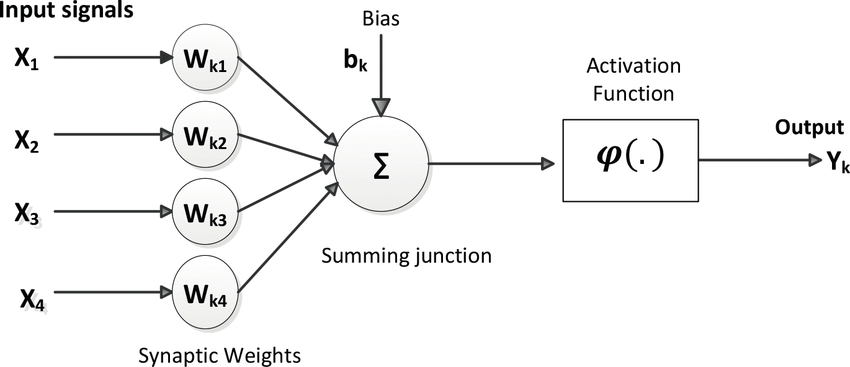

Completa el código de esta función realizar el *forward pass* de una neurona artificial con función de activación sigmoide, es decir, para calcular la salida a partir del vector de entrada, el vector de pesos y el valor de bias:


In [7]:
def neurona_forward(x, w, bias):
    #TODO - Completa la siguiente línea
    return 1 / (1 + np.e**(-(np.matmul(x, w.T) + bias)))

# verificación
np.testing.assert_almost_equal(0.54983399, neurona_forward(x, w, bias))

## Red feed-forward

Con este montaje, si utilizásemos descenso de gradiente para aprender el vector $\mathbf{w}$ que haga las predicciones correctas para un conjunto de datos dado, estaríamos entrenando un modelo de regresión logística. Sin embargo, la potencia de las redes neuronales reside en la posibilidad de combinar muchas de estas unidades para poder modelar funciones mucho más complejas, por lo que vamos a construir una red que utilice varias unidades.

El modo más sencillo de organizar varias neuronas es formando una red *feed-forward*. Para ello, primero agruparemos varias neuronas formando una *capa*. Si la salida de una neurona era un escalar $y$, la salida de una capa será un vector $\mathbf{y}$ con tantas componentes como unidades tenga la capa. Igualmente, si en una neurona teníamos un vector $\mathbf{w}$ de pesos, en una capa tendremos una matriz $\mathbf{W}$ de pesos, en la que cada fila corresponderá con el vector de pesos de una neurona de la capa. También tendremos un vector $\mathbf{b}$, donde cada componente será el *bias* de una neurona de la capa.

Podemos aprovechar las operaciones de matrices y vectores de NumPy para hacer el *forward pass* de toda una capa de una sola vez. Completa el siguiente código para obtener una función que realice el *forward pass* de una capa de neuronas artificiales con activación sigmoide tomando como entradas el vector de entrada $\mathbf{x}$, una matriz de pesos $\mathbf{W}$ y un vector $\mathbf{b}$.

In [8]:
# Asegúrate de que tu implementación de sigmoide puede tomar como entrada un vector. 
# La función np.exp de NumPy te puede resultar útil, porque puede tomar como entrada un escalar y devolver un escalar, 
# pero también puede tomar un vector y devolver otro vector.
np.testing.assert_almost_equal([0.549834, 0.98201379], sigmoide(np.array([z[0][0],4])))

def capa_forward(x, W, b):
    # TODO - Completa el código. La versatilidad de NumPy hace que esto sea muy sencillo
    # Vector de entradas * Matriz de pesos + Bias
    z = np.matmul(x, W.T) + b
    # Aplicamos la funcion de activación
    return  sigmoide(z)

# verificación
np.testing.assert_almost_equal(np.array([[0.549834], [0.05732418]]), capa_forward(np.vstack((x, np.array([-1, 3, -2, 2]))), w, np.array([bias, -0.1]).reshape((2,1))))

Ahora podemos concatenar capas de neuronas con facilidad. Vamos a crear una red de tres capas:
 1. La capa $C_0$ consta de 5 unidades. Recibe como entrada el vector $\mathbf{x}$ y produce como salida el vector $\mathbf{h_0}$. Tiene una matriz de pesos $\mathbf{W_0}$ y un vector de bias $\mathbf{b_0}$.
 1. La capa $C_1$ consta de 3 unidades. Recibe como entrada el vector $\mathbf{h_0}$ y produce como salida el vector $\mathbf{h_1}$. Tiene una matriz de pesos $\mathbf{W_1}$ y un vector de bias $\mathbf{b_1}$.
 1. La capa $C_2$ consta de 1 unidad. Recibe como entrada el vector $\mathbf{h_1}$ y produce como salida el vector $\mathbf{y}$. Tiene una matriz de pesos $\mathbf{W_2}$ y un vector de bias $\mathbf{b_2}$.
 
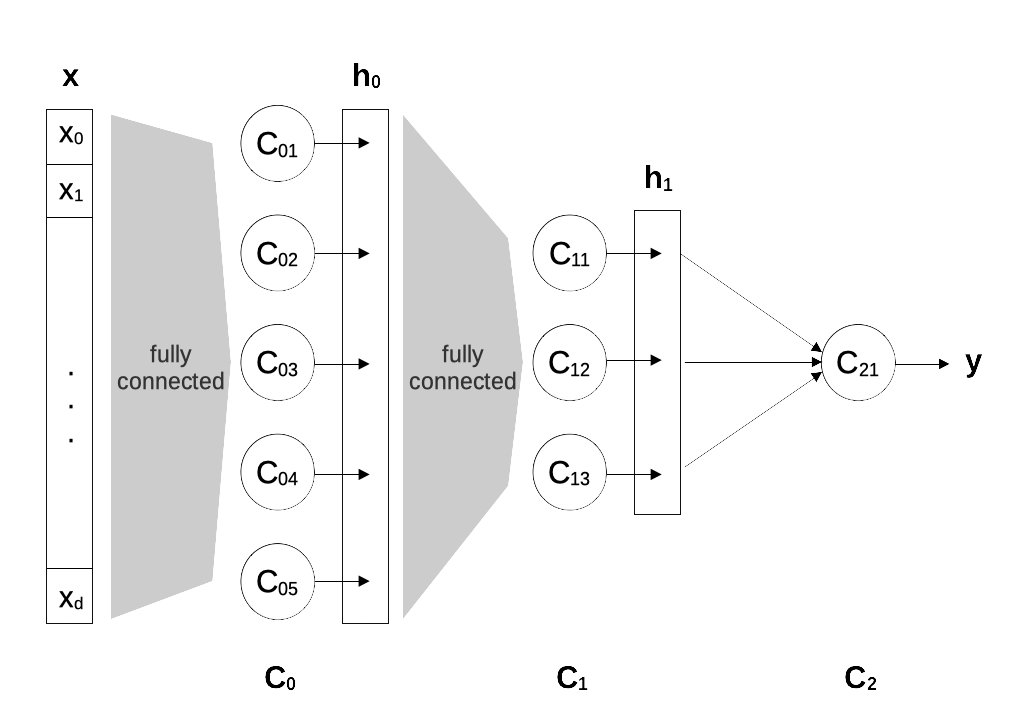

Completa la siguiente celda para calcular la salida de la red.

In [19]:
# Inicialización de pesos
np.random.seed(1234567) # Fijamos la semilla para que los números aleatorios salgan igual en cada ejecución para poder verificar los resultados
# TODO - Completa las dimensiones de las matrices
# C0 -> 5 neuronas || C1 -> 3 neuronas || C2 -> 1 neurona
# Los BIAS van desde 1 al número de neuronas en la capa correspondiente
# Los PESOS es una matriz con: (x -> Capa siguiente (filas), y -> capa anterior (columnas))
W0 = np.random.rand(5, x.shape[1]) - 0.5
b0 = np.random.rand(1, 5) - 0.5
W1 = np.random.rand(3, 5) - 0.5
b1 = np.random.rand(1, 3) - 0.5
W2 = np.random.rand(1, 3) - 0.5
b2 = np.random.rand(1, 1) - 0.5

# Función auxiliar que utiliza la red neuronal para hacer una predicción
def calcula_prediccion(x):
    # TODO - Calcula las salidas de cada capa
    h0 = capa_forward(x, W0, b0)    # Salida C0
    h1 = capa_forward(h0, W1, b1)   # Salida C1
    y = capa_forward(h1, W2, b2)    # Salida C2
    return y

# verificación
np.testing.assert_almost_equal(0.34535528, calcula_prediccion(x))

# Hacer predicciones con la red sobre un conjunto de datos

Ahora que sabemos definir una red, probemos qué predicciones hace sobre un conjunto de datos. 
Usaremos el conjunto `german_credit_numeric` de `tensorflow_datasets`. 
* Este conjunto de datos clasifica a las personas descritas por un conjunto de atributos como de buen o mal riesgo crediticio. 
* Este _dataset_ es una variante «numérica» del _dataset_ original, en la que los atributos categóricos y categóricos ordenados se han codificado como cantidades indicadoras y enteras, respectivamente.
* El _dataset_ consta de 24 características (_features_) numéricas y una salida numérica en la que el valor `0` se corresponde con un mal riesgo crediticio y el valor `1` se corresponde con un buen riesgo crediticio.
* Mas información en: https://www.tensorflow.org/datasets/catalog/german_credit_numeric

Calcularemos la salida predicha para cada entrada y la compararemos con la etiqueta que se espera.

In [20]:
import tensorflow_datasets as tfds

# Cargamos el conjunto de datos
ds = tfds.load('german_credit_numeric', split='train')

# TODO - Adapta las dimensiones de los parámetros de la capa de entrada (C0) para que coincidan con el tamaño de los vectores del conjunto de datos, que tienen 24 componentes
W0 = np.random.rand(5, 24) - 0.5    # La matriz de pesos incial tiene el mismo tamaño que las "features" que tengamos
b0 = np.random.rand(1, 5)           # El vector de BIAS es tiene tantos elementos como neuronas la capa


# Función auxiliar que, dada una lista de vectores de entrada, calcula la tasa de aciertos de la red
def calcula_tasa_aciertos(ejemplos):
    num_aciertos = 0
    num_elems = 0
    for ej in ejemplos:
        x = tfds.as_numpy(ej["features"])
        label = tfds.as_numpy(ej["label"])
        y_pred = calcula_prediccion(x)

        # Actualizamos los contadores de elementos y de aciertos
        num_elems += 1
        if ((y_pred > 0.5) and (label==1)) or ((y_pred <= 0.5) and (label==0)):
            num_aciertos += 1

    return num_aciertos / float(num_elems)
        
print('La tasa de acierto es del', calcula_tasa_aciertos(ds.take(100)))

La tasa de acierto es del 0.27


2024-09-26 18:43:26.871542: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-09-26 18:43:26.871802: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Previsiblemente, la red no funciona bien dado que las matrices de pesos contienen vectores aleatorios. Para que las predicciones mejoren, tenemos que ajustar nuestro modelo al conjunto de datos, es decir, encontrar valores para los parámetros ($\mathbf{W_0}$, $\mathbf{b_0}$, $\mathbf{W_1}$, $\mathbf{b_1}$, $\mathbf{W_2}$, $\mathbf{b_2}$) que arrojen buenas predicciones.

# Entrenamiento de la red

## La función de coste
Para entrenar la red utilizaremos un proceso de optimización. En primer lugar, debemos definir qué función queremos optimizar. Necesitamos una función que, dada una combinación de parámetros de la red, devuelva un valor alto cuando las predicciones con esos parámetros sean malas y un valor bajo cuando estas sean buenas. Esto es lo que denominamos la **función de coste** ($J$). Definiremos una **función de pérdida** ($\mathcal{L}$) que reciba como entrada una predicción y una etiqueta real y nos indique cómo de desacertada es la predicción. En este caso utilizaremos la entropía cruzada binaria, descrita como:

$$\mathcal{L}(y_{pred},y_{etiqueta}) = - y_{etiqueta} \log(y_{pred}) - (1-y_{etiqueta})  \log(1-y_{pred})$$

La función de coste ($J$) será la media de la función de pérdida en los $m$ ejemplos del conjunto de entrenamiento:
$$ J(\mathbf{W},\mathbf{b}) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(y_{pred}^{(i)}, y_{etiqueta}^{(i)}) $$

Si minimizamos $J$, nuestras predicciones serán mejores. Para minimizar $J$ utilizaremos **descenso de gradiente**: haremos sucesivos pasos en los que calcularemos el gradiente de $J$ respecto a los distintos parámetros ($\mathbf{W},\mathbf{b}$) y actualizaremos los parámetros en la dirección del gradiente, con la esperanza de que el siguiente paso obtenga un valor de $J$ menor. Repetiremos este proceso durante un número fijo de pasos.

Por tanto, el algoritmo que debemos aplicar es el siguiente:
 1. Calcular la pérdida de las predicciones con los valores actuales de $\mathbf{W}$ y $\mathbf{b}$
 1. Calcular el gradiente respecto $\mathbf{W}$ y $\mathbf{b}$.
 1. Actualizar $\mathbf{W}$ y $\mathbf{b}$ en la dirección de sus gradientes respectivos.

## Gradientes
El segundo paso nos obliga a ser capaces de calcular el gradiente de $J(\mathbf{W},\mathbf{b})$ respecto a cada uno de los parámetros, es decir, la derivada parcial de $J(\mathbf{W},\mathbf{b})$ respecto a cada parámetro. Para ello iremos propagando el gradiente hacia atrás, calculando a cada paso el gradiente en el nodo anterior a partir de los posteriores. Calculemos, por ejemplo, el gradiente de $J(\mathbf{W},\mathbf{b})$ respecto a $z_2$:

$$ \frac{\partial J(\mathbf{W},\mathbf{b})}{\partial z_2} = \frac{\partial (\frac{1}{m} \sum_{i=1}^m \mathcal{L}(y_{pred}^{(i)}, y_{etiqueta}^{(i)}))}{\partial z_2} = \frac{1}{m} \sum_{i=1}^m \frac{\partial \mathcal{L}(y_{pred}^{(i)}, y_{etiqueta}^{(i)})}{\partial z_2} $$

Aplicando la regla de la cadena ([ver el desarrollo completo](./lab2-gradientes.pdf)) obtenemos las siguientes fórmulas para los gradientes:

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial b_2} = \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial z_2}$$

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial W_2} = \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial z_2} h_1^T $$.

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial h_1} = \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial z_2} W_2^T $$

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial z_1} = \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial h_1} h_1 (1 - h_1) = dLdz1$$

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial b_1} = \sum_{i=1}^{5} dJdz1_i $$

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial W_1} = diag(dLdz1) h_0^T $$

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial h_0} = diag(dLdz1) W_1 $$

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial z0} = \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial h_0} h_0 (1 - h_0) = dLdz0$$

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial b_0} = \sum_{i=1}^{5} dLdz0_i $$

$$ \frac{\partial \mathcal{L}(y_{pred}, y_{etiqueta})}{\partial W_0} = diag(dLdz0) x^T $$

Conociendo estas fórmulas podemos adaptar nuestra función para que, además de calcular la predicción, devuelva los gradientes de la función de pérdida respecto a las variables involucradas.

In [21]:
def calcula_y_propaga(x, y_etiqueta):
    ''' Devuelve la salida predicha y, el valor de la función de pérdida y un diccionario con los gradientes de las variables
    '''
    x = x.reshape((1,24))
    
    # Cálculo de la salida
    # TODO - Rellena las siguientes líneas
    # Calculamos las entradas para las capas foreward
    z0 = np.matmul(x, W0.T) + b0
    h0 = capa_forward(x, W0, b0)
    z1 = np.matmul(h0, W1.T) + b1
    h1 = capa_forward(h0, W1, b1)
    z2 = np.matmul(h1, W2.T) + b2
    y = capa_forward(h1, W2, b2)
    
    #Backpropagation
    dLdz2 = y - y_etiqueta
    dLdb2 = dLdz2
    dLdW2 = dLdz2 * h1
    dLdh1 = np.matmul(dLdz2.T, W2)
    dLdz1 = dLdh1 * h1 * (1 - h1)
    dLdb1 = dLdz1
    dLdW1 = np.matmul(dLdz1.T, h0)
    dLdh0 = np.matmul(dLdz1, W1)
    dLdz0 = dLdh0 * h0 * (1 - h0)
    dLdb0 = dLdz0
    dLdW0 = np.matmul(dLdz0.T, x)
    
    # Los gradientes tienen que tener la misma forma que las variables respecto a las que se toman
    assert(dLdz2.shape==z2.shape)
    assert(dLdb2.shape==b2.shape)
    assert(dLdW2.shape==W2.shape)
    assert(dLdh1.shape==h1.shape)
    assert(dLdz1.shape==z1.shape)
    assert(dLdb1.shape==b1.shape)
    assert(dLdW1.shape==W1.shape)
    assert(dLdh0.shape==h0.shape)
    assert(dLdz0.shape==z0.shape)
    assert(dLdb0.shape==b0.shape)
    assert(dLdW0.shape==W0.shape)
    
    # Preparación del diccionario de gradientes
    gradientes = {}
    gradientes["b2"] = dLdb2
    gradientes["b1"] = dLdb1
    gradientes["b0"] = dLdb0
    gradientes["W2"] = dLdW2
    gradientes["W1"] = dLdW1
    gradientes["W0"] = dLdW0
    
    # Pérdida
    # TODO - Rellena la siguiente línea
    # Calculamos la perdida para toda la neurona
    perdida = np.mean(-y_etiqueta * np.log(y) - (1 - y_etiqueta) * np.log(1 - y))  # Entropía cruzada
    return y, perdida.flatten(), gradientes

# verificación
for elem in ds.take(1):
    prediccion, perdida, gradientes = calcula_y_propaga(elem["features"].numpy(), elem["label"].numpy())
    np.testing.assert_almost_equal(0.34011586, prediccion[0])
    np.testing.assert_almost_equal(1.07846895, perdida[0])

2024-09-26 18:43:35.769614: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


## Bucle de aprendizaje
Una vez podemos calcular los gradientes respecto a las variables para cada ejemplo del conjunto de entrenamiento ya podemos implementar el bucle de entrenamiento.

Completa esta función para que realice `num_pasos` de entrenamiento en los cuales se haga lo siguiente:
 1. Calcular las predicciones, pérdidas y gradientes para cada elemento del conjunto de entrenamiento
 1. Calcular el valor promedio de cada gradiente
 1. Utilizar dichos promedios para actualizar las variables
Llevaremos también cuenta de la tasa de aciertos y del valor de la función de coste a cada paso.

In [12]:
def entrena(ejemplos, etiquetas, num_pasos, learning_rate = 0.001):
    paso = 0
    while paso < num_pasos:
        num_aciertos = 0
        num_elems = 0
        perdida_total = 0
        for x, label in zip(ejemplos, etiquetas):
            # TODO - Completa la siguiente línea
            y_pred, perdida, gradientes = calcula_y_propaga(x, label)

            # Actualizamos los contadores de elementos y de aciertos
            num_elems += 1
            if ((y_pred > 0.5) and (label==1)) or ((y_pred <= 0.5) and (label==0)):
                num_aciertos += 1
                
            # Actualizamos el acumulador de la pérdida_total
            perdida_total += perdida
            
            # Actualizamos las variables en la dirección de su gradiente
            global W2, W1, W0, b2, b1, b0
            # TODO - Completa las siguientes líneas
            W2 = W2 - learning_rate * gradientes['W2']
            W1 = W1 - learning_rate * gradientes['W1']
            W0 = W0 - learning_rate * gradientes['W0']
            b2 = b2 - learning_rate * gradientes['b2']
            b1 = b1 - learning_rate * gradientes['b1']
            b0 = b0 - learning_rate * gradientes['b0']
            
        tasa_aciertos = num_aciertos / float(num_elems)
        perdida = perdida_total / float(num_elems)
        print(f'Epoch: {paso}/{num_pasos}: Pérdida: {perdida} Aciertos: {tasa_aciertos}')
        paso += 1

Para probar nuestro algoritmo de entrenamiento, tomemos solo los 100 primeros elementos del conjunto de datos y entrenemos el modelo para que se ajuste a dichos datos.

In [13]:
tamano_lote = 100
elems = ds.batch(tamano_lote)
lote_entrenamiento = None
for elem in elems:
    lote_entrenamiento = elem
    break
vectores_x = tfds.as_numpy(tf.cast(lote_entrenamiento["features"],dtype=tf.float64))
etiquetas = tfds.as_numpy(tf.cast(lote_entrenamiento["label"],dtype=tf.float64))

entrena(vectores_x, etiquetas, 5000)

Epoch: 0/5000: Pérdida: [0.8828747] Aciertos: 0.27
Epoch: 1/5000: Pérdida: [0.85456337] Aciertos: 0.27
Epoch: 2/5000: Pérdida: [0.82891753] Aciertos: 0.27
Epoch: 3/5000: Pérdida: [0.80571908] Aciertos: 0.27
Epoch: 4/5000: Pérdida: [0.78476001] Aciertos: 0.27
Epoch: 5/5000: Pérdida: [0.76584115] Aciertos: 0.27
Epoch: 6/5000: Pérdida: [0.74877282] Aciertos: 0.27
Epoch: 7/5000: Pérdida: [0.73337657] Aciertos: 0.27
Epoch: 8/5000: Pérdida: [0.71948693] Aciertos: 0.27
Epoch: 9/5000: Pérdida: [0.70695242] Aciertos: 0.27
Epoch: 10/5000: Pérdida: [0.69563581] Aciertos: 0.47
Epoch: 11/5000: Pérdida: [0.68541355] Aciertos: 0.68
Epoch: 12/5000: Pérdida: [0.6761748] Aciertos: 0.73
Epoch: 13/5000: Pérdida: [0.66782031] Aciertos: 0.73
Epoch: 14/5000: Pérdida: [0.66026121] Aciertos: 0.73
Epoch: 15/5000: Pérdida: [0.65341794] Aciertos: 0.73
Epoch: 16/5000: Pérdida: [0.64721925] Aciertos: 0.73
Epoch: 17/5000: Pérdida: [0.64160128] Aciertos: 0.73
Epoch: 18/5000: Pérdida: [0.63650681] Aciertos: 0.73
Epoch

2024-09-26 18:42:24.691266: W tensorflow/core/kernels/data/cache_dataset_ops.cc:913] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch: 282/5000: Pérdida: [0.57907695] Aciertos: 0.73
Epoch: 283/5000: Pérdida: [0.57906011] Aciertos: 0.73
Epoch: 284/5000: Pérdida: [0.5790433] Aciertos: 0.73
Epoch: 285/5000: Pérdida: [0.57902651] Aciertos: 0.73
Epoch: 286/5000: Pérdida: [0.57900974] Aciertos: 0.73
Epoch: 287/5000: Pérdida: [0.57899298] Aciertos: 0.73
Epoch: 288/5000: Pérdida: [0.57897622] Aciertos: 0.73
Epoch: 289/5000: Pérdida: [0.57895947] Aciertos: 0.73
Epoch: 290/5000: Pérdida: [0.57894272] Aciertos: 0.73
Epoch: 291/5000: Pérdida: [0.57892598] Aciertos: 0.73
Epoch: 292/5000: Pérdida: [0.57890922] Aciertos: 0.73
Epoch: 293/5000: Pérdida: [0.57889246] Aciertos: 0.73
Epoch: 294/5000: Pérdida: [0.57887569] Aciertos: 0.73
Epoch: 295/5000: Pérdida: [0.57885891] Aciertos: 0.73
Epoch: 296/5000: Pérdida: [0.57884211] Aciertos: 0.73
Epoch: 297/5000: Pérdida: [0.57882529] Aciertos: 0.73
Epoch: 298/5000: Pérdida: [0.57880846] Aciertos: 0.73
Epoch: 299/5000: Pérdida: [0.5787916] Aciertos: 0.73
Epoch: 300/5000: Pérdida: [0.5

Implementar el bucle de entrenamiento es una tarea complicada porque cada iteración requiere hacer el *forward propagation* y el *backpropagation* lo que, a su vez, implica llevar cuenta de resultados parciales para calcular cada uno de los gradientes con los que actualizar los parámetros.

Además de la complejidad de organizar el código que lleve a cabo dicho algoritmo, se deben tener en cuenta los siguientes factores:
 - El código debería permitir redes con cualquier número de capas las cuales, a su vez, deberán contener un número arbitrario de unidades. Incluso sería ideal que permitiese arquitecturas distintas de la red *feed forward*.
 - El uso de memoria debe ser eficiente, no almacenando más resultados de los necesarios para cada cómputo.
 - Del mismo modo, debería evitarse realizar operaciones innecesarias y paralelizar las que sea posible.
 - El código debería ser extensible para permitir otras funciones de coste.
 
Por todo ello es por lo que habitualmente se utilizan frameworks especializados como __TensorFlow__ y __Keras__ para trabajar con redes neuronales. Este tipo de software nos permite definir modelos y entrenarlos de manera eficiente sin que debamos preocuparnos de calcular derivadas ni de los detalles de implementación.